In [1]:
%load_ext rpy2.ipython
# extension for using R cell magic in python

In [2]:
%%R
# loading R packages
library(phyloseq)
library(plyr)
library(dplyr)
#dplyr needs to come in last
library(ggplot2)
library(RColorBrewer)
library(reshape)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/f

In [3]:
%%R
detach("package:reshape", unload=TRUE)

In [4]:
%%R
physeq = import_biom("../data/otu_table_tax_no211_meta.biom", parseFunction=parse_taxonomy_greengenes)

In [5]:
%%R
mdf = psmelt(physeq)

In [12]:
%%R
head(mdf)

          OTU Sample Abundance Plants DayAmdmt Amdmt ID Day  Kingdom
102339 OTU.18   S147     11235      0       12     2  F   1 Bacteria
376704  OTU.4   S142      8998      0       12     2  F   1 Bacteria
376670  OTU.4   S143      8803      0       12     2  F   1 Bacteria
102319 OTU.18   S144      7370      0       12     2  F   1 Bacteria
14      OTU.1   S203      6940      1       20     0  C   2 Bacteria
376740  OTU.4   S144      6755      0       12     2  F   1 Bacteria
               Phylum               Class             Order             Family
102339 Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae
376704 Proteobacteria  Betaproteobacteria   Burkholderiales   Oxalobacteraceae
376670 Proteobacteria  Betaproteobacteria   Burkholderiales   Oxalobacteraceae
102319 Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae
14     Proteobacteria Alphaproteobacteria  Sphingomonadales  Sphingomonadaceae
376740 Proteobacteria  Betaproteobacteria  

In [14]:
%%R
cutoff = 0
d = mdf %>%
    dplyr::group_by(Sample) %>%
    dplyr::mutate(Abundance = Abundance / sum(Abundance))%>%
# Calculates the relative abundance of each OTU in each sample
    dplyr::group_by(DayAmdmt,Day,Amdmt,OTU)%>%
    dplyr::summarize(Abundance=mean(Abundance))%>%
    dplyr::filter(Abundance>cutoff)
# Calculates the mean relative abundance for each OTU for each treatment
d

Source: local data frame [53,894 x 5]
Groups: DayAmdmt, Day, Amdmt [9]

   DayAmdmt   Day Amdmt      OTU    Abundance
      (chr) (chr) (chr)    (chr)        (dbl)
1        00     0     0    OTU.1 1.861073e-02
2        00     0     0   OTU.10 3.863284e-03
3        00     0     0  OTU.100 5.275052e-04
4        00     0     0 OTU.1000 1.332010e-04
5        00     0     0 OTU.1001 1.590339e-04
6        00     0     0 OTU.1002 2.058712e-04
7        00     0     0 OTU.1004 5.616206e-05
8        00     0     0 OTU.1005 2.225119e-04
9        00     0     0 OTU.1006 5.466466e-05
10       00     0     0 OTU.1007 4.866607e-05
..      ...   ...   ...      ...          ...


In [15]:
%%R
test=t(cast(d,DayAmdmt~OTU))
test =as.data.frame(as.matrix(test))
colnames(test) = c("SoilT0","SoilT1","SoilT2","PyOMT0","PyOMT1","PyOMT2","StoverT0","StoverT1","StoverT2")
test = test %>%
    arrange(-SoilT0)%>%
    mutate(InitialRank = c(1:dim(test)[1]))
test = melt(test,id="InitialRank")
test = as.data.frame(as.matrix(test))
BL = paste(test[test$variable=="SoilT0",]$value)
IR = paste(test[test$variable=="SoilT0",]$InitialRank)
test = test %>%
    mutate(Trtmt = substr(paste(variable),1,4))%>%
    mutate(Day = substr(paste(variable),nchar(paste(variable))-1,nchar(paste(variable))))%>%
    mutate(Baseline = c(BL,BL,BL,BL,BL,BL,BL,BL,BL))
#    group_by(variable)%>%
#    arrange(variable,-value)%>%
#    mutate(VariableRank = c(1:7770))
head(test)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Using Abundance as value column.  Use the value argument to cast to override this choice

  res = super(Function, self).__call__(*new_args, **new_kwargs)


  InitialRank variable        value Trtmt Day     Baseline
1           1   SoilT0 2.199939e-02  Soil  T0 2.199939e-02
2           2   SoilT0 1.861073e-02  Soil  T0 1.861073e-02
3           3   SoilT0 1.149848e-02  Soil  T0 1.149848e-02
4           4   SoilT0 1.030556e-02  Soil  T0 1.030556e-02
5           5   SoilT0 8.965813e-03  Soil  T0 8.965813e-03
6           6   SoilT0 8.208842e-03  Soil  T0 8.208842e-03


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following `from` values were not present in `x`: Stov

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following `from` values were not present in `x`: T0, T1, T2

  res = super(Function, self).__call__(*new_args, **new_kwargs)


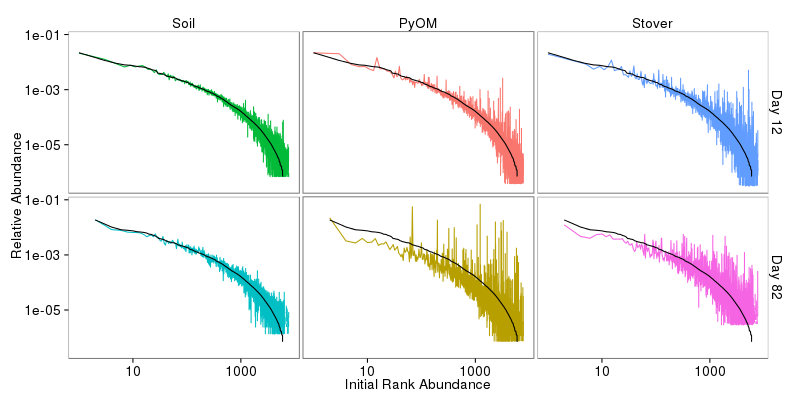

In [17]:
%%R -w 800 -h 400
test$Trtmt = revalue(test$Trtmt,c("PyOM"="PyOM","Soil"="Soil","Stov"="Stover"))
test$Trtmt = factor(test$Trtmt,levels=c("Soil","PyOM","Stover"))
test$Day = revalue(test$Day,c("T0"="Day 1","T1"="Day 12","T2"="Day 82"))
test$InitialRank = as.numeric(paste(test$InitialRank))
test$value = as.numeric(paste(test$value))
test$Baseline = as.numeric(paste(test$Baseline))

test = test %>%
    filter(Day == c("Day 12", "Day 82"))

p = ggplot(test, aes(x=InitialRank,y=value,colour=variable))
p = p + geom_line()
p = p + scale_y_continuous(trans="log10") + scale_x_continuous(trans="log10")

p = p + geom_line(aes(y=Baseline),colour="black")
p = p + facet_grid(~Day~Trtmt)
p = p + ylab("Relative Abundance") + xlab("Initial Rank Abundance")
p = p + guides(colour=FALSE)
p = p + theme_bw() +
  theme(
    plot.background = element_rect(fill = "transparent", colour = NA)
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,panel.background = element_rect(fill = "transparent",colour = NA)
  ) +
  theme(strip.background = element_rect(colour="white", fill="white"),
       axis.text = element_text(size=14),
       axis.title = element_text(size=14),
       strip.text = element_text(size=14))
p

In [303]:
%%R
ggsave(filename = "RankAbund.pdf", plot = p, width=8, height =8)

In [229]:
%%R
test$InitialRank = as.numeric(paste(test$InitialRank))
test$value = as.numeric(paste(test$value))
baseline = test[test$variable=="SoilT0",]


[1] "numeric"


In [82]:
%%R
low = 0
high = 1000
d.ranked = d %>%
    filter(Day==0,Amdmt==0)%>%
    arrange(-Abundance)
d.ranked.top = d.ranked[low:high,]
OTUlist = d.ranked.top$OTU

In [83]:
%%R
d = d %>%
    filter(OTU %in% OTUlist)
d

Source: local data frame [9,000 x 5]
Groups: DayAmdmt, Day, Amdmt [9]

   DayAmdmt   Day Amdmt      OTU    Abundance
      (chr) (chr) (chr)    (chr)        (dbl)
1        00     0     0    OTU.1 0.0186107256
2        00     0     0   OTU.10 0.0038632843
3        00     0     0  OTU.100 0.0005275052
4        00     0     0 OTU.1002 0.0002058712
5        00     0     0 OTU.1005 0.0002225119
6        00     0     0 OTU.1008 0.0002625249
7        00     0     0  OTU.101 0.0007938149
8        00     0     0 OTU.1012 0.0002197293
9        00     0     0  OTU.102 0.0009319214
10       00     0     0 OTU.1020 0.0001848358
..      ...   ...   ...      ...          ...


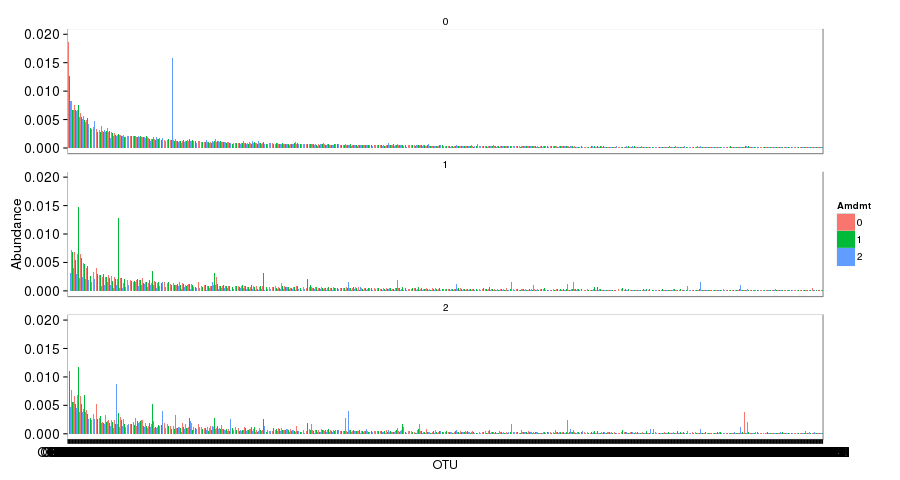

In [10]:
%%R -w 900

d$OTU = factor(d$OTU,levels=c(paste(OTUlist)))
p = ggplot(d,aes(x=OTU,y=Abundance, fill=Amdmt))
p = p + geom_bar(stat="identity",position="dodge")
p = p + facet_wrap(~Day,ncol=1)
p = p + theme_bw() +
  theme(
    plot.background = element_rect(fill = "transparent", colour = NA)
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,panel.background = element_rect(fill = "transparent",colour = NA)
  ) +
  theme(strip.background = element_rect(colour="white", fill="white"),
       axis.text = element_text(size=14),
       axis.title.y = element_text(size=14))
p = p + ylim(c(0,0.02))
p

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?

  res = super(Function, self).__call__(*new_args, **new_kwargs)


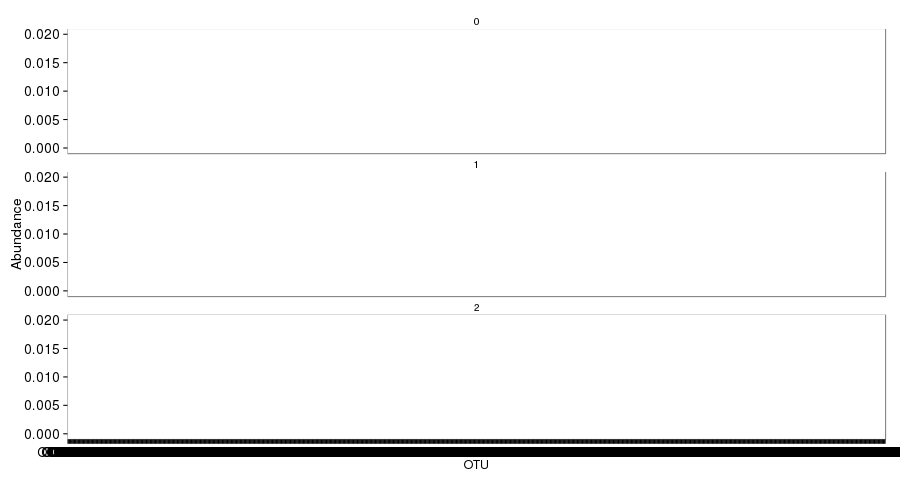

In [84]:
%%R -w 900

#d$OTU = factor(d$OTU,levels=c(paste(OTUlist)))
p = ggplot(d,aes(x=OTU,y=Abundance, fill=Amdmt))
p = p + geom_line()
p = p + facet_wrap(~Day,ncol=1)
p = p + theme_bw() +
  theme(
    plot.background = element_rect(fill = "transparent", colour = NA)
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,panel.background = element_rect(fill = "transparent",colour = NA)
  ) +
  theme(strip.background = element_rect(colour="white", fill="white"),
       axis.text = element_text(size=14),
       axis.title.y = element_text(size=14))
p = p + ylim(c(0,0.02))
p

In [6]:
%%R
L2FC = read.csv("../data/l2fc.csv")
head(L2FC)

  Day Amdmt     OTU   baseMean        l2FC         SE    pvalue  Kingdom
1   1     1  OTU.43  223.48048 -0.11012779 0.29052924 0.7046439 Bacteria
2   1     1   OTU.2 1664.01427  0.11095267 0.07837381 0.1568676 Bacteria
3   1     1 OTU.187  362.13258  0.06605159 0.15991481 0.6795756 Bacteria
4   1     1 OTU.150   39.05672  0.03205671 0.15816953 0.8393906 Bacteria
5   1     1  OTU.91   62.21140 -0.01718316 0.37497442 0.9634498 Bacteria
6   1     1 OTU.305   37.70726 -0.14629517 0.27103038 0.5893528 Bacteria
          Phylum               Class            Order            Family
1    Nitrospirae          Nitrospira    Nitrospirales    Nitrospiraceae
2 Proteobacteria Alphaproteobacteria      Rhizobiales Bradyrhizobiaceae
3  Acidobacteria      Acidobacteriia Acidobacteriales   Koribacteraceae
4 Proteobacteria Alphaproteobacteria Rhodospirillales  Acetobacteraceae
5  Bacteroidetes      Flavobacteriia Flavobacteriales   [Weeksellaceae]
6    Chloroflexi      Thermomicrobia     JG30-KF-CM45    

In [7]:
%%R
cutoff = 0.000
MeanAbund = mdf %>%
    dplyr::group_by(Sample) %>%
    dplyr::mutate(Abundance = Abundance / sum(Abundance))%>%
# Calculates the relative abundance of each OTU in each sample
    dplyr::group_by(DayAmdmt,Day,Amdmt,OTU)%>%
    dplyr::summarize(Abundance=mean(Abundance))%>%
    dplyr::filter(Abundance>cutoff)
# Calculates the mean relative abundance for each OTU for each treatment
MeanAbund

Source: local data frame [53,894 x 5]
Groups: DayAmdmt, Day, Amdmt [9]

   DayAmdmt   Day Amdmt      OTU    Abundance
      (chr) (chr) (chr)    (chr)        (dbl)
1        00     0     0    OTU.1 1.861073e-02
2        00     0     0   OTU.10 3.863284e-03
3        00     0     0  OTU.100 5.275052e-04
4        00     0     0 OTU.1000 1.332010e-04
5        00     0     0 OTU.1001 1.590339e-04
6        00     0     0 OTU.1002 2.058712e-04
7        00     0     0 OTU.1004 5.616206e-05
8        00     0     0 OTU.1005 2.225119e-04
9        00     0     0 OTU.1006 5.466466e-05
10       00     0     0 OTU.1007 4.866607e-05
..      ...   ...   ...      ...          ...


In [36]:
%%R
Merged = merge(MeanAbund,L2FC,by=c("Day","Amdmt","OTU"))

In [37]:
%%R
MeanAbund.ranked = MeanAbund %>%
    filter(Day==0,Amdmt==0)%>%
    arrange(-Abundance)
OTUlist = MeanAbund.ranked$OTU
Merged$OTU = factor(Merged$OTU,levels=c(paste(OTUlist)))

In [38]:
%%R
Merged$Rank = Merged$OTU
Merged$Rank = as.numeric(Merged$Rank)

In [39]:
%%R
head(Merged)

  Day Amdmt      OTU DayAmdmt    Abundance    baseMean        l2FC        SE
1   1     1    OTU.1       11 0.0329748528 2436.596794  0.20542160 0.1745180
2   1     1   OTU.10       11 0.0046775872  318.859837  0.48840184 0.2117117
3   1     1  OTU.100       11 0.0013481468  107.692479  0.16249933 0.3483671
4   1     1 OTU.1000       11 0.0001002793    8.012698 -0.05912125 0.2152890
5   1     1 OTU.1001       11 0.0001161304   12.085913 -0.42946608 0.3678736
6   1     1 OTU.1002       11 0.0001741673   14.290413 -0.18209508 0.2403854
      pvalue  Kingdom          Phylum               Class            Order
1 0.23916366 Bacteria  Proteobacteria Alphaproteobacteria Sphingomonadales
2 0.02105929 Bacteria  Actinobacteria      Actinobacteria  Actinomycetales
3 0.64088622 Bacteria  Proteobacteria Alphaproteobacteria Sphingomonadales
4 0.78361327 Bacteria  Proteobacteria Deltaproteobacteria     Myxococcales
5 0.24303742 Bacteria Verrucomicrobia      [Pedosphaerae] [Pedosphaerales]
6 0.4487425

### Getting initial abundance values

In [50]:
%%R
InitialOTUAbund = MeanAbund%>%
    filter(Day==0)%>%
    filter(Amdmt==0)%>%
    select(OTU,Abundance)
# Gets a data table of the OTUs and their abundance at initial dates
i=0
Merged$InitialAbund = 0
while (i < length(Merged$OTU)) {
    thisOTU = Merged$OTU[i]
    thisInitialAbund = InitialOTUAbund[InitialOTUAbund$OTU==thisOTU,5]
    Merged$InitialAbund[i]=thisInitialAbund
    i=i+1
}
head(Merged)

  Day Amdmt      OTU DayAmdmt    Abundance    baseMean        l2FC        SE
1   1     1    OTU.1       11 0.0329748528 2436.596794  0.20542160 0.1745180
2   1     1   OTU.10       11 0.0046775872  318.859837  0.48840184 0.2117117
3   1     1  OTU.100       11 0.0013481468  107.692479  0.16249933 0.3483671
4   1     1 OTU.1000       11 0.0001002793    8.012698 -0.05912125 0.2152890
5   1     1 OTU.1001       11 0.0001161304   12.085913 -0.42946608 0.3678736
6   1     1 OTU.1002       11 0.0001741673   14.290413 -0.18209508 0.2403854
      pvalue  Kingdom          Phylum               Class            Order
1 0.23916366 Bacteria  Proteobacteria Alphaproteobacteria Sphingomonadales
2 0.02105929 Bacteria  Actinobacteria      Actinobacteria  Actinomycetales
3 0.64088622 Bacteria  Proteobacteria Alphaproteobacteria Sphingomonadales
4 0.78361327 Bacteria  Proteobacteria Deltaproteobacteria     Myxococcales
5 0.24303742 Bacteria Verrucomicrobia      [Pedosphaerae] [Pedosphaerales]
6 0.4487425

In [65]:
%%R
Merged = Merged %>%
        mutate(sigpos = ifelse(padj<FDR & l2FC>cutoff, 1,0))

Resp.PyOM = Merged[Merged$Amdmt==1,]
Resp.Stover = Merged[Merged$Amdmt==2,]

Merged.PyOM.Stover = merge(Resp.PyOM,Resp.Stover,by=c("Day","OTU","Phylum","InitialAbund"),all=T)

Merged.Resp = Merged.PyOM.Stover %>%
    mutate(Responders = ifelse(sigpos.x==0 & sigpos.y==1,"Stover Only",
                               ifelse(sigpos.x==1 & sigpos.y==1,"Both",
                                      ifelse(sigpos.x==1 & sigpos.y==0,"PyOM Only",
                                             ifelse(sigpos.x==0 & sigpos.y==0,"None","None")))))%>%
    select(Day,OTU,Phylum,InitialAbund,Responders)
head(Merged.Resp)

  Day      OTU           Phylum InitialAbund Responders
1   1    OTU.2   Proteobacteria  0.021999394       None
2   1    OTU.1   Proteobacteria  0.018610726       None
3   1  OTU.124   Proteobacteria  0.011498476       None
4   1 OTU.4547    Acidobacteria  0.010305558       None
5   1   OTU.19    Acidobacteria  0.008965813       None
6   1   OTU.15 Gemmatimonadetes  0.008208842       None


In [69]:
%%R
# Summarizing the initial abundances for unique and both responders
Merged.Resp$InitialAbund = as.numeric(paste(Merged.Resp$InitialAbund))
MergedSummary = Merged.Resp %>%
    group_by(Day,Responders)%>%
    summarize(Mean=mean(InitialAbund,na.rm=TRUE),SD=sd(InitialAbund,na.rm=TRUE),Sum=sum(InitialAbund,na.rm=TRUE))%>%
    filter(Responders==c("Both","None","PyOM Only","Stover Only"))
# Keeping the NAs out
MergedSummary

Source: local data frame [8 x 5]
Groups: Day [2]

    Day  Responders         Mean           SD          Sum
  (chr)       (chr)        (dbl)        (dbl)        (dbl)
1     1        Both 1.642878e-04 0.0002394566 0.0029571811
2     1        None 2.879329e-04 0.0009003902 0.9291593943
3     1   PyOM Only 1.113917e-04 0.0002613670 0.0008911339
4     1 Stover Only 2.389056e-04 0.0006382032 0.0516036078
5     2        Both 1.713098e-04 0.0007067461 0.0181588400
6     2        None 3.080505e-04 0.0009426256 0.8982751764
7     2   PyOM Only 5.743131e-05 0.0001355300 0.0039627604
8     2 Stover Only 1.926374e-04 0.0003903302 0.0620292548


In [68]:
%%R
# Summarizing the initial abundances for all responders, not unique/both combos
Merged$InitialAbund = as.numeric(paste(Merged$InitialAbund))
MergedSummaryAll = Merged %>%
    filter(l2FC>=1)%>%
    filter(padj<=0.1)%>%
    group_by(DayAmdmt,Day,Amdmt)%>%
    summarize(Mean=mean(InitialAbund,na.rm=TRUE),SD=sd(InitialAbund,na.rm=TRUE),Sum=sum(InitialAbund,na.rm=TRUE))
MergedSummaryAll

Source: local data frame [4 x 6]
Groups: DayAmdmt, Day [?]

  DayAmdmt   Day Amdmt         Mean           SD         Sum
     (chr) (chr) (chr)        (dbl)        (dbl)       (dbl)
1       11     1     1 0.0001297952 0.0002299551 0.003893857
2       12     1     2 0.0002168604 0.0005971674 0.054648828
3       21     2     1 0.0001034649 0.0005045144 0.022348425
4       22     2     2 0.0001607424 0.0004539155 0.080853448


### Making Wilcoxon Rank Sum tests for the abundances

In [73]:
%%R
head(Merged.Resp)

  Day      OTU           Phylum InitialAbund Responders
1   1    OTU.2   Proteobacteria  0.021999394       None
2   1    OTU.1   Proteobacteria  0.018610726       None
3   1  OTU.124   Proteobacteria  0.011498476       None
4   1 OTU.4547    Acidobacteria  0.010305558       None
5   1   OTU.19    Acidobacteria  0.008965813       None
6   1   OTU.15 Gemmatimonadetes  0.008208842       None


In [76]:
%%R
d = Merged.Resp
# Comparisons
# Stover D1 vs D2; PyOM D1 vs D2; Both D1 vs D2; D1 Stover vs PyOM; D2 Stover vs PyOM
SD1 = na.omit(d[d$Day==1 & d$Responders=="Stover Only",4])
PD1 = na.omit(d[d$Day==1 & d$Responders=="PyOM Only",4])
BD1 = na.omit(d[d$Day==1 & d$Responders=="Both",4])
SD2 = na.omit(d[d$Day==2 & d$Responders=="Stover Only",4])
PD2 = na.omit(d[d$Day==2 & d$Responders=="PyOM Only",4])
BD2 = na.omit(d[d$Day==2 & d$Responders=="Both",4])

# D1 Stover vs PyOM
print(wilcox.test(c(SD1),c(PD1)))
# D2 Stover vs PyOM
print(wilcox.test(c(SD2),c(PD2)))
# Stover D1 vs D2
print(wilcox.test(c(SD1,BD1),c(SD2,BD2)))
# PyOM D1 vs D2
print(wilcox.test(c(PD1,BD1),c(PD2,BD2)))
# Both D1 vs D2
print(wilcox.test(BD1,BD2))


	Wilcoxon rank sum test with continuity correction

data:  c(SD1) and c(PD1)
W = 1159, p-value = 0.1018
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  c(SD2) and c(PD2)
W = 16454, p-value = 3.533e-10
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  c(SD1, BD1) and c(SD2, BD2)
W = 48240, p-value = 0.4351
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  c(PD1, BD1) and c(PD2, BD2)
W = 2612, p-value = 0.224
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  BD1 and BD2
W = 1192, p-value = 0.09205
alternative hypothesis: true location shift is not equal to 0



### Making old rank abundance figures

In [29]:
%%R
cutoff=1
Ranked = Merged%>%
    filter(l2FC>=cutoff&padj<=0.1)
as.factor(Ranked$Day)
Ranked$Day=revalue(Ranked$Day, c("1"="Day 12", "2"="Day 82"))
as.factor(Ranked$Amdmt)
Ranked$Amdmt=revalue(Ranked$Amdmt, c("1"="PyOM", "2"="Stover"))

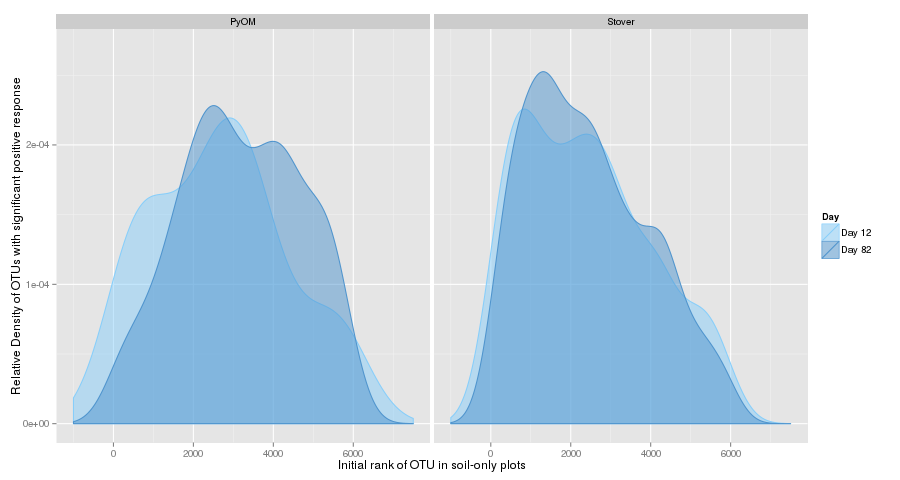

In [30]:
%%R -w 900
# Need list of Rank for those that have l2FC above cutoff.

p = ggplot(Ranked, aes(Rank,colour=Day,fill=Day))
#p = p + geom_histogram(aes(y=..density..), alpha=0.5,position='identity',binwidth=250)
p = p + geom_density(aes(y=..density..), alpha=0.5,position='identity',binwidth=250)
p = p + facet_wrap(~Amdmt)
p = p + scale_colour_manual(values=c("lightskyblue","steelblue3"))
p = p + scale_fill_manual(values=c("lightskyblue","steelblue3"))
p = p + ylim(c(0,0.00027)) + xlim(c(-1000,7500))
p = p + ylab("Relative Density of OTUs with significant positive response") + xlab("Initial rank of OTU in soil-only plots")
p

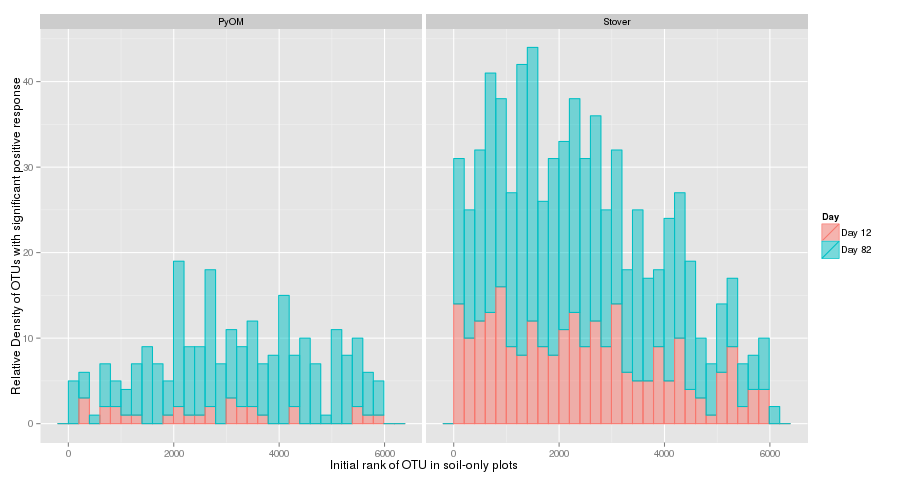

In [109]:
%%R -w 900
# Need list of Rank for those that have l2FC above cutoff.

p = ggplot(Ranked, aes(Rank,colour=Day,fill=Day))
p = p + geom_histogram(alpha=0.5)
#p = p + geom_density(alpha=0.5,position='identity',binwidth=250)
p = p + facet_wrap(~Amdmt)
#p = p + ylim(c(0,0.0005)) + xlim(c(-1000,7500))
p = p + ylab("Relative Density of OTUs with significant positive response") + xlab("Initial rank of OTU in soil-only plots")
p

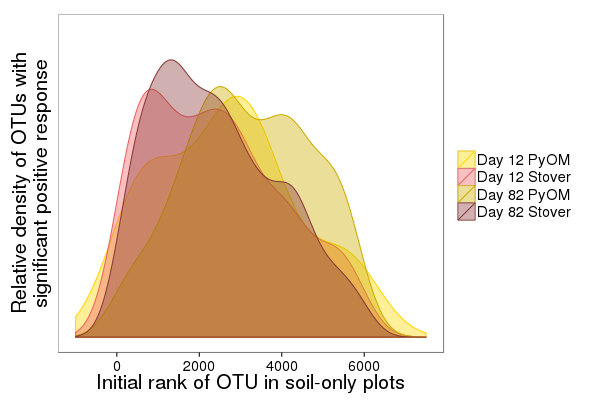

In [110]:
%%R -w 600 -h 400
# Need list of Rank for those that have l2FC above cutoff.

d = Ranked%>%
    mutate(Treatment=c(paste(Day,Amdmt)))

p = ggplot(d, aes(Rank,colour=Treatment,fill=Treatment))
#p = p + geom_histogram(aes(y=..density..), alpha=0.5,position='identity',binwidth=250)
p = p + geom_density(aes(y=..density..), alpha=0.4,position='identity',binwidth=250)
#p = p + facet_wrap(~Amdmt)
p = p + scale_colour_manual(values=c("gold1","indianred2","gold3","indianred4"))
p = p + scale_fill_manual(values=c("gold1","indianred2","gold3","indianred4"))
p = p + ylim(c(0,0.00028)) + xlim(c(-1000,7500))
p = p + ylab("Relative density of OTUs with\nsignificant positive response") + xlab("Initial rank of OTU in soil-only plots")

p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
   ,strip.text.x = element_text(size=14, face="bold")
   ,strip.background = element_rect(colour="white", fill="white"))

p = p + theme(strip.text.x = element_text(size = 20),
              strip.text.y = element_text(size = 20),
              axis.text.x = element_text(size = 15),
              axis.title.x = element_text(size = 20),
              axis.text.y = element_blank(),
              axis.ticks.y = element_blank(),
              axis.title.y = element_text(size = 20),
              legend.title = element_blank(),
              legend.text = element_text(size = 15))

p

In [170]:
%%R
ggsave(filename = "ResponderDensity_1.pdf", plot = p, width=8, height = 6)

In [8]:
%%R
# Or what if I plotted rank abundance in one vs rank abundance in another?
# e.g. rank abundance initially vs rank abundance for all the other situations?
# Should it be rank or just relabund?
# Maybe rank is good...
head(MeanAbund)


Error in head(MeanAbund) : object 'MeanAbund' not found


In [99]:
%%R
casted = cast(MeanAbund,OTU~Day+Amdmt)
head(casted)


Error in withVisible({ : could not find function "cast"


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in withVisible({ : could not find function "cast"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## Trying to make Both distribution

In [64]:
%%R
FDR = 0.1
cutoff = 1

Merged = merge(MeanAbund,L2FC,by=c("Day","Amdmt","OTU"))
Merged = Merged %>%
        mutate(sigpos = ifelse(padj<FDR & l2FC>cutoff, 1,0))
# Joins the L2FC responses to our general OTU taxa table, and makes a column with whether a response is significant

MeanAbund.ranked = MeanAbund %>%
    filter(Day==0,Amdmt==0)%>%
    arrange(-Abundance)
OTUlist = MeanAbund.ranked$OTU
# Creates a list of the OTUs in order of their initial rank-order

Merged$OTU = factor(Merged$OTU,levels=c(paste(OTUlist)))
# Sets the OTU as a factor, ordered by the rank-order of soil Day 1
Merged$Rank = Merged$OTU
# Creates a new variable with the rank of its intial status
Merged$Rank = as.numeric(Merged$Rank)
# And reports that as a number, not its name

In [65]:
%%R
Resp.PyOM = Merged[Merged$Amdmt==1,]
Resp.Stover = Merged[Merged$Amdmt==2,]

In [66]:
%%R
Merged.PyOM.Stover = merge(Resp.PyOM,Resp.Stover,by=c("Day","OTU","Phylum","Rank"),all=T)

In [67]:
%%R
Merged.Resp = Merged.PyOM.Stover %>%
    mutate(Responders = ifelse(sigpos.x==0 & sigpos.y==1,"Stover Only",
                               ifelse(sigpos.x==1 & sigpos.y==1,"Both",
                                      ifelse(sigpos.x==1 & sigpos.y==0,"PyOM Only",
                                             ifelse(sigpos.x==0 & sigpos.y==0,"None","None")))))%>%
    select(Day,OTU,Phylum,Rank,Responders)
head(Merged.Resp)

  Day      OTU           Phylum Rank Responders
1   1    OTU.2   Proteobacteria    1       None
2   1    OTU.1   Proteobacteria    2       None
3   1  OTU.124   Proteobacteria    3       None
4   1 OTU.4547    Acidobacteria    4       None
5   1   OTU.19    Acidobacteria    5       None
6   1   OTU.15 Gemmatimonadetes    6       None


In [68]:
%%R

Ranked = Merged.Resp
as.factor(Ranked$Day)
Ranked$Day=revalue(Ranked$Day, c("1"="Day 12", "2"="Day 82"))

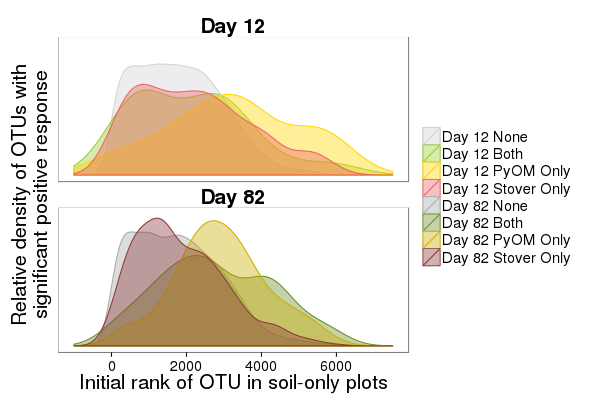

In [69]:
%%R -w 600 -h 400
# Need list of Rank for those that have l2FC above cutoff.

d = Ranked%>%
    mutate(Treatment=c(paste(Day,Responders)))%>%
    filter(Responders!=is.na(Responders))

d$Treatment = factor(d$Treatment,levels=c("Day 12 None","Day 12 Both","Day 12 PyOM Only","Day 12 Stover Only",
                                          "Day 82 None","Day 82 Both","Day 82 PyOM Only","Day 82 Stover Only"))

p = ggplot(d, aes(Rank,colour=Treatment,fill=Treatment))
#p = p + geom_histogram(aes(y=..density..), alpha=0.5,position='identity',binwidth=250)
p = p + geom_density(aes(y=..density..), alpha=0.4,position='identity',binwidth=250)

p = p + facet_wrap(~Day,ncol=1)

p = p + scale_colour_manual(values=c("lightgrey","olivedrab3","gold1","indianred2","darkgrey","olivedrab","gold3","indianred4"))
p = p + scale_fill_manual(values=c("lightgrey","olivedrab3","gold1","indianred2","darkgrey","olivedrab","gold3","indianred4"))
p = p + ylim(c(0,0.00035)) + xlim(c(-1000,7500))
p = p + ylab("Relative density of OTUs with\nsignificant positive response") + xlab("Initial rank of OTU in soil-only plots")

p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
   ,strip.text.x = element_text(size=14, face="bold")
   ,strip.background = element_rect(colour="white", fill="white"))

p = p + theme(strip.text.x = element_text(size = 20),
              strip.text.y = element_text(size = 20),
              axis.text.x = element_text(size = 15),
              axis.title.x = element_text(size = 20),
              axis.text.y = element_blank(),
              axis.ticks.y = element_blank(),
              axis.title.y = element_text(size = 20),
              legend.title = element_blank(),
              legend.text = element_text(size = 15))

p

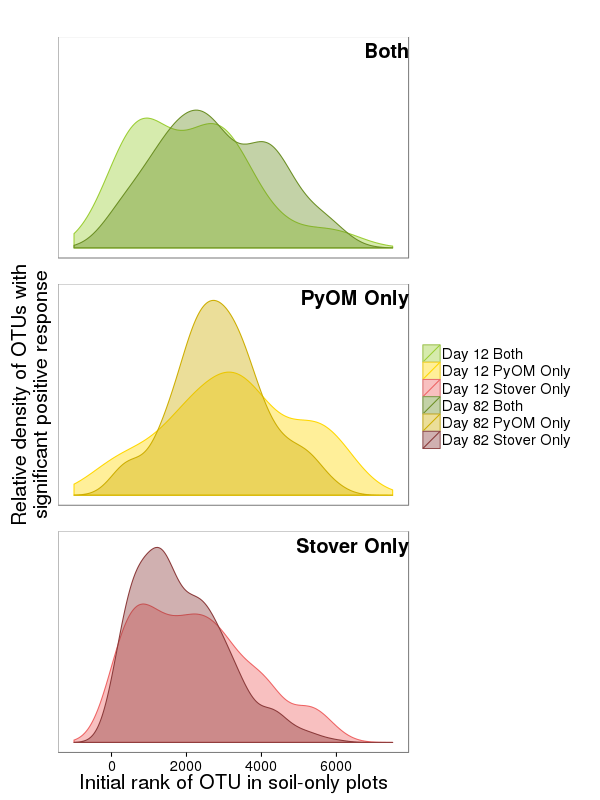

In [70]:
%%R -w 600 -h 800
# Need list of Rank for those that have l2FC above cutoff.

d = Ranked%>%
    na.omit()%>%
    filter(Responders!="None")%>%
    mutate(Treatment=c(paste(Day,Responders)))%>%
    filter(Responders!=is.na(Responders))

d$Treatment = factor(d$Treatment,levels=c("Day 12 Both","Day 12 PyOM Only","Day 12 Stover Only",
                                          "Day 82 Both","Day 82 PyOM Only","Day 82 Stover Only"))

p = ggplot(d, aes(Rank,colour=Treatment,fill=Treatment))
#p = p + geom_histogram(aes(y=..density..), alpha=0.5,position='identity',binwidth=250)
p = p + geom_density(aes(y=..density..), alpha=0.4,position='identity',binwidth=250)

p = p + facet_wrap(~Responders,ncol=1)

p = p + scale_colour_manual(values=c("olivedrab3","gold1","indianred2","olivedrab","gold3","indianred4"))
p = p + scale_fill_manual(values=c("olivedrab3","gold1","indianred2","olivedrab","gold3","indianred4"))
p = p + ylim(c(0,0.00035)) + xlim(c(-1000,7500))
p = p + ylab("Relative density of OTUs with\nsignificant positive response") + xlab("Initial rank of OTU in soil-only plots")

p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
   ,strip.text.x = element_text(size=14, face="bold")
   ,strip.background = element_rect(colour="white", fill="white"))

p = p + theme(strip.text.x = element_text(size = 20, vjust=-3, hjust=1),
              strip.text.y = element_text(size = 20),
              axis.text.x = element_text(size = 15),
              axis.title.x = element_text(size = 20),
              axis.text.y = element_blank(),
              axis.ticks.y = element_blank(),
              axis.title.y = element_text(size = 20),
              legend.title = element_blank(),
              legend.text = element_text(size = 15))

p

In [80]:
%%R
#na.omit(d[d$Treatment=="Day 12 Stover Only",])
print(wilcox.test(na.omit(d[(d$Treatment=="Day 12 Stover Only" | d$Treatment=="Day 12 Both"),4]), na.omit(d[(d$Treatment=="Day 82 Stover Only" | d$Treatment=="Day 82 Both"),4]), paired=FALSE) )
print(wilcox.test(na.omit(d[(d$Treatment=="Day 12 PyOM Only"| d$Treatment=="Day 12 Both"),4]), na.omit(d[(d$Treatment=="Day 82 PyOM Only"| d$Treatment=="Day 82 Both"),4]), paired=FALSE) )
print(wilcox.test(na.omit(d[(d$Treatment=="Day 12 Stover Only"| d$Treatment=="Day 12 Both"),4]), na.omit(d[(d$Treatment=="Day 12 PyOM Only"| d$Treatment=="Day 12 Both"),4]), paired=FALSE) )
print(wilcox.test(na.omit(d[(d$Treatment=="Day 82 Stover Only"| d$Treatment=="Day 82 Both"),4]), na.omit(d[(d$Treatment=="Day 82 PyOM Only"| d$Treatment=="Day 82 Both"),4]), paired=FALSE) )
print(wilcox.test(na.omit(d[(d$Treatment=="Day 12 Both"),4]), na.omit(d[(d$Treatment=="Day 82 Both"),4]), paired=FALSE) )
print(wilcox.test(na.omit(d[(d$Treatment=="Day 82 Both"),4]), na.omit(d[(d$Treatment=="Day 82 PyOM Only"),4]), paired=FALSE) )


	Wilcoxon rank sum test with continuity correction

data:  na.omit(d[(d$Treatment == "Day 12 Stover Only" | d$Treatment ==  and na.omit(d[(d$Treatment == "Day 82 Stover Only" | d$Treatment ==     "Day 12 Both"), 4]) and     "Day 82 Both"), 4])
W = 51914, p-value = 0.4348
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  na.omit(d[(d$Treatment == "Day 12 PyOM Only" | d$Treatment ==  and na.omit(d[(d$Treatment == "Day 82 PyOM Only" | d$Treatment ==     "Day 12 Both"), 4]) and     "Day 82 Both"), 4])
W = 1936, p-value = 0.237
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  na.omit(d[(d$Treatment == "Day 12 Stover Only" | d$Treatment ==  and na.omit(d[(d$Treatment == "Day 12 PyOM Only" | d$Treatment ==     "Day 12 Both"), 4]) and     "Day 12 Both"), 4])
W = 2777, p-value = 0.4672
alternative hypothesis: true location shift is not equal to 0




#### Wilcoxon results

#### Using only the unique ones
Stover is different on the two days  
PyOM is not different on the two days  
PyOM and Stover not different on day 12  
PyOM and Stover are different on Day 82  

#### Using only the unique ones
Stover is not different on the two days  
PyOM is not different on the two days  
PyOM and Stover are not different on day 12  
PyOM and Stover are different only on Day 82  

In [46]:
%%R
head(d)

     Day      OTU         Phylum Rank  Responders          Treatment
1 Day 12    OTU.3 Actinobacteria   15 Stover Only Day 12 Stover Only
2 Day 12   OTU.10 Actinobacteria   33 Stover Only Day 12 Stover Only
3 Day 12   OTU.62 Actinobacteria   62 Stover Only Day 12 Stover Only
4 Day 12    OTU.4 Proteobacteria   68 Stover Only Day 12 Stover Only
5 Day 12 OTU.2948 Proteobacteria   91 Stover Only Day 12 Stover Only
6 Day 12 OTU.3553 Proteobacteria  100 Stover Only Day 12 Stover Only


In [52]:
%%R
SummData = function(vars){
    summary.df = data.frame(M=numeric(),SE=numeric())
        dataset = d[d$Treatment==vars,4]
        average = mean(dataset)
        stdev = sd(dataset)
        se = sd(dataset)/sqrt(length(dataset))
        summary.df=c(vars,average,stdev,se)
        print(summary.df)
}

In [41]:
%%R
print(c("mean rank",mean(d$Rank)))
d[d$Phylum=="Firmicutes",]

[1] "mean rank" NA         
         Day      OTU     Phylum Rank  Responders          Treatment
117   Day 12 OTU.4334 Firmicutes  117        None        Day 12 None
127   Day 12   OTU.92 Firmicutes  127        None        Day 12 None
139   Day 12    OTU.6 Firmicutes  139 Stover Only Day 12 Stover Only
335   Day 12  OTU.220 Firmicutes  335        None        Day 12 None
400   Day 12 OTU.6016 Firmicutes  400        None        Day 12 None
423   Day 12  OTU.149 Firmicutes  423        None        Day 12 None
442   Day 12   OTU.84 Firmicutes  442 Stover Only Day 12 Stover Only
446   Day 12 OTU.6632 Firmicutes  446        None        Day 12 None
632   Day 12 OTU.8085 Firmicutes  632 Stover Only Day 12 Stover Only
647   Day 12 OTU.5216 Firmicutes  647        None        Day 12 None
686   Day 12 OTU.1097 Firmicutes  686        None        Day 12 None
812   Day 12  OTU.353 Firmicutes  812        None        Day 12 None
821   Day 12  OTU.373 Firmicutes  821 Stover Only Day 12 Stover Only
832   

In [53]:
%%R
vars = c("Day 12 Stover Only","Day 12 PyOM Only","Day 82 Stover Only","Day 82 PyOM Only","Day 12 Both","Day 82 Both")
for (i in vars) {SummData(i)}

[1] "Day 12 Stover Only" "2230.79166666667"   "1509.07915495849"  
[4] "102.679830864409"  
[1] "Day 12 PyOM Only" "3233.5"           "1797.56470179598" "635.535095130754"
[1] "Day 82 Stover Only" "1860.74534161491"   "1193.62956405796"  
[4] "66.5183749935315"  
[1] "Day 82 PyOM Only" "2896.30882352941" "1219.33519025313" "147.86611124842" 
[1] "Day 12 Both"      "2140.27777777778" "1533.69664174141" "361.495765219463"
[1] "Day 82 Both"      "2792.14150943396" "1500.17879212972" "145.71024518038" 


In [ ]:
%%R
print(wilcox.test(na.omit(d[(d$Treatment=="Day 12 Stover Only" | d$Treatment=="Day 12 Both"),3]), na.omit(d[(d$Treatment=="Day 82 Stover Only" | d$Treatment=="Day 82 Both"),3]), paired=FALSE) )
print(wilcox.test(na.omit(d[(d$Treatment=="Day 12 PyOM Only"| d$Treatment=="Day 12 Both"),3]), na.omit(d[(d$Treatment=="Day 82 PyOM Only"| d$Treatment=="Day 82 Both"),3]), paired=FALSE) )
print(wilcox.test(na.omit(d[(d$Treatment=="Day 12 Stover Only"| d$Treatment=="Day 12 Both"),3]), na.omit(d[(d$Treatment=="Day 12 PyOM Only"| d$Treatment=="Day 12 Both"),3]), paired=FALSE) )
print(wilcox.test(na.omit(d[(d$Treatment=="Day 82 Stover Only"| d$Treatment=="Day 82 Both"),3]), na.omit(d[(d$Treatment=="Day 82 PyOM Only"| d$Treatment=="Day 82 Both"),3]), paired=FALSE) )
print(wilcox.test(na.omit(d[(d$Treatment=="Day 12 Both"),3]), na.omit(d[(d$Treatment=="Day 82 Both"),3]), paired=FALSE) )